<a href="https://colab.research.google.com/github/cindysame179/Data-Analytics-Work/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Summary

This data set contains data about 768 individuals with 9 attributes being:

Pregnancies - Number of times pregnant

Glucose - plasma glucose concentration at 2 hours in a oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm/Hg)

SkinThickness - Triceps skin fold insulin (mm)

Insulin - 2 hour serum insulin (U/ml)

BMI - Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - function which scores the likelihood of diabetes based on family history

Age - age in years

Outcome - indicates if the patient has or had diabetes with 1 being yes and 0 indicating no

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cindysame179/Data-Analytics-Work/main/diabetes.csv")
df.shape

(768, 9)

In [4]:
#checking for nulls

df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Based on the results above, the data set does not contain any nulls or missing values.

In [6]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

From this information, we see that there are many attributes with a minimum value of 0. While this may make sense for certain attributes like pregnancies and outcome, this does not make sense for many other attributes like BMI, SkinThickness, etc.

In [13]:
#checking the amount of glucose values at 0

df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [14]:
#checking the amount of BloodPressure values at 0
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [16]:
#checking the amount of SkinThickness values at 0
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [15]:
#checking the amount of Insulin values at 0
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
#checking the amount of BMI values at 0
df[df['BMI'] == 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [27]:
df.drop(df[(df['BMI'] == 0) | (df['Glucose'] == 0) | (df['BloodPressure'] == 0)].index, inplace = True)
df.shape

(724, 9)

After checking the zero value rows, it was decided that rows with BMI, Glucose, or BloodPressure with values of zero will be dropped. Many of those entries had other zero values that did not make sense and the total number of all these entries were only 44. Dropping them still leaves us with the data of 724 individuals, meaning that we still have the large majority of the data to work with.

In [36]:
#creating table of insulin values not equal to zero to calculate the mean to replace the zero values
Itable = df[df['Insulin'] != 0]
Imean = Itable['Insulin'].mean()
df['Insulin'].mask(df['Insulin'] == 0, Imean, inplace = True)
df[df['Insulin'] == 0].shape

(0, 9)

In [37]:
#creating table of SkinThickness values not equal to zero to calculate the mean to replace the zero values
STtable = df[df['SkinThickness'] != 0]
STmean = STtable['SkinThickness'].mean()
df['SkinThickness'].mask(df['SkinThickness'] == 0, STmean, inplace = True)
df[df['SkinThickness'] == 0].shape

(0, 9)

Since the amount of data with 0 values for Insulin and SkinThickness was too large, we cannot drop those values as that would result in too much of the data lost. However, we cannot leave these values at zero since it does not make sense for them to be zero. To fix this, all of those values were replaced with their respective means.

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


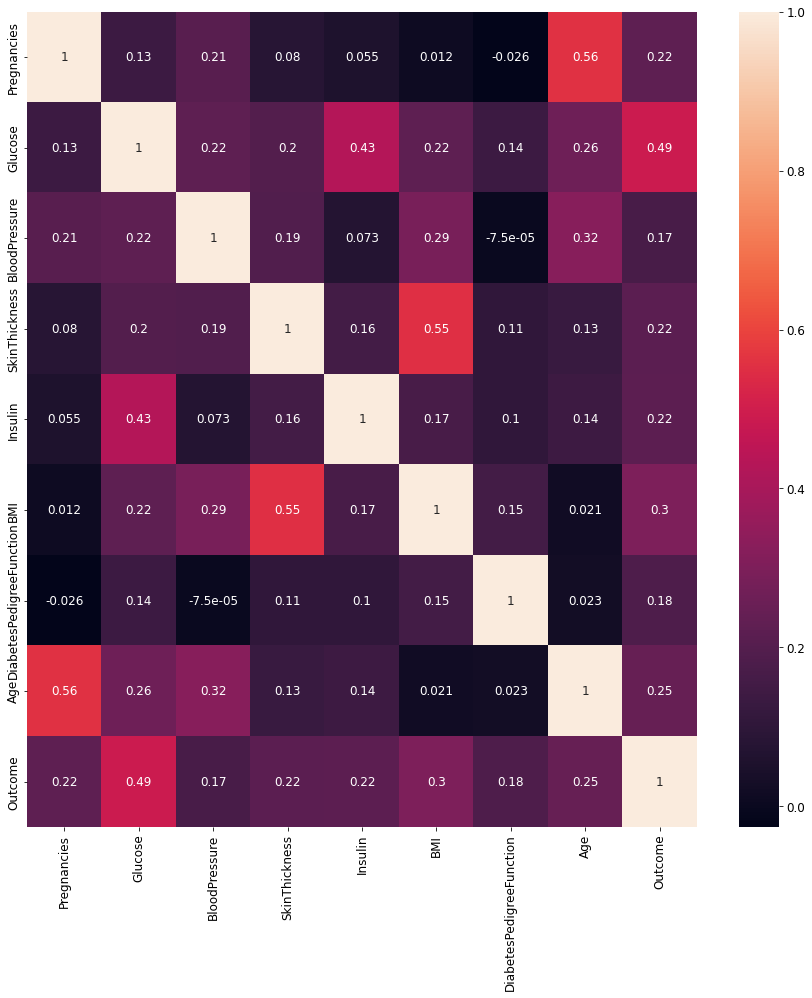

In [40]:
corrMatrix = df.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
map = sns.heatmap(corrMatrix, annot=True)
plt.show()

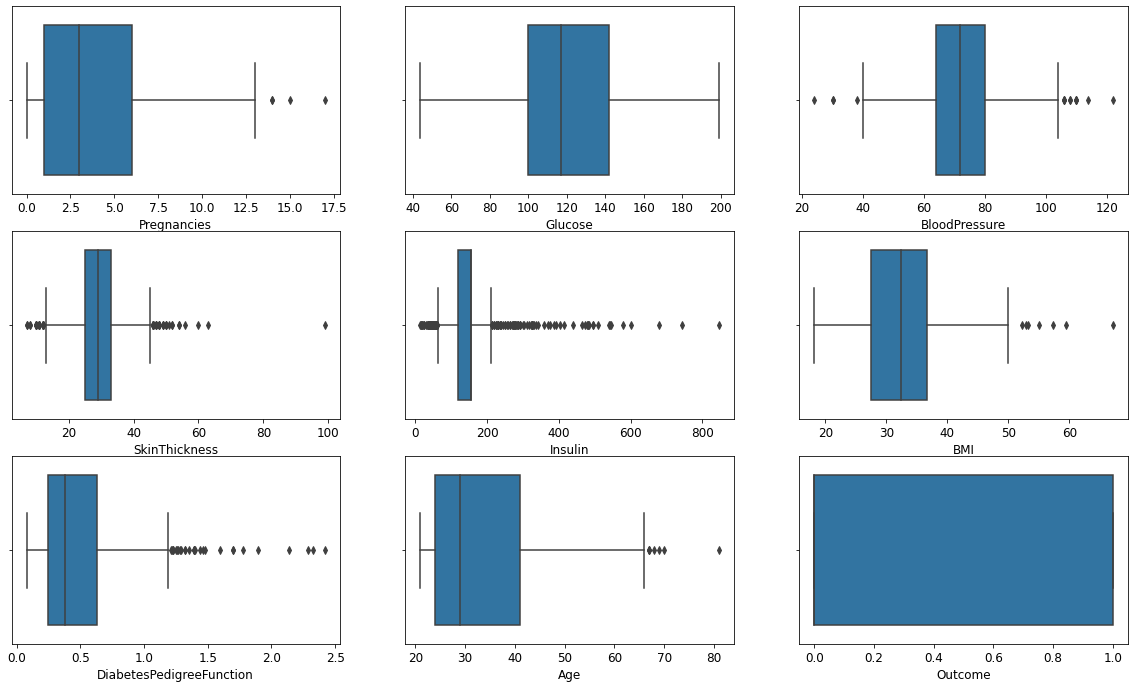

In [41]:
plt.figure(figsize=(20,20))

z = 1
columns=df.columns.tolist()
for y in columns:
    plt.subplot(5,3,z) 
    sns.boxplot(x = y, data = df)
    z = z+1

##Logistic Regression model
 